# DeepSegmentator Colab version (Last update: 2021-04-02)

Please check original authors in https://github.com/yhlleo/DeepSegmentor

And adapted in https://github.com/DZDL/DeepSegmentor

# 1. Clone the repository with Colab support

In [43]:
import os
if os.path.isdir('/content/DeepSegmentor'):
  !git pull;
else:
  !git clone https://github.com/DZDL/DeepSegmentor

Already up to date.


In [44]:
%cd DeepSegmentor

[Errno 2] No such file or directory: 'DeepSegmentor'
/content/DeepSegmentor


# 2. Install requirements

In [45]:
!pip3 install -r requirements.txt

# 3. Downloand the weights.

Check more in https://github.com/DZDL/DeepSegmentor

In [50]:
# Create paths
mypaths=['./checkpoints',  # For Both models
         './checkpoints/deepcrack',  # For DeepCrack only
         './datasets/DeepCrack', # For DeepCrack only
         './datasets/DeepCrack/test_img',  # For DeepCrack only
         './checkpoints/roadnet',  # For Roadnet only
         './datasets/RoadNet',  # For Roadnet only
         './datasets/RoadNet/test_image',  # For Roadnet only
         './datasets/RoadNet/test_segment',  # For Roadnet only
         './datasets/RoadNet/test_edge',  # For Roadnet only
         './datasets/RoadNet/test_centerline',  # For Roadnet only
         ]

for path in mypaths:
  if not os.path.isdir(path):
    os.mkdir(path)
    print(f'Created: \t\t{path}')
  else:
    print(f'Already exists: \t{path} ')

Already exists: 	./checkpoints 
Already exists: 	./checkpoints/deepcrack 
Already exists: 	./datasets/DeepCrack 
Already exists: 	./datasets/DeepCrack/test_img 
Already exists: 	./checkpoints/roadnet 
Already exists: 	./datasets/RoadNet 
Already exists: 	./datasets/RoadNet/test_image 
Already exists: 	./datasets/RoadNet/test_segment 
Created: 		./datasets/RoadNet/test_edge
Created: 		./datasets/RoadNet/test_centerline


In [47]:
# Deepcrak Pretrained weights 
!gdown --id 12-iXK656aGUIWCtN9gb0Ko7qotyn9ZcI -O ./checkpoints/deepcrack/latest_net_G.pth;

# Deepcrak Pretrained weights 
!gdown --id 1l7qVaZp0xg0Sc4H83Yn6215K2JK_Time -O ./checkpoints/roadnet/latest_net_G.pth;

Downloading...
From: https://drive.google.com/uc?id=12-iXK656aGUIWCtN9gb0Ko7qotyn9ZcI
To: /content/DeepSegmentor/checkpoints/deepcrack/latest_net_G.pth
58.9MB [00:00, 142MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1l7qVaZp0xg0Sc4H83Yn6215K2JK_Time
To: /content/DeepSegmentor/checkpoints/roadnet/latest_net_G.pth
68.4MB [00:00, 103MB/s]


# 4. Upload your images automatically or manually

This step depends on what you want to do.
If manually, upload files to : (For deepcrack)

- /content/DeepSegmentor/datasets/DeepCrack/test_img/

or for (roadnet):

- /content/DeepSegmentor/datasets/RoadNet/test_img/



In [51]:
# DEMO (RANDOM CRACK IMAGE) (DEEPCRACK)
!wget https://github.com/DZDL/DeepSegmentor/raw/master/datasets/demo/crack_image.png -O /content/DeepSegmentor/datasets/DeepCrack/test_img/demo_crack_image.png

# DEMO (RANDOM ROAD IMAGE) (ROADNET)
!wget https://github.com/DZDL/DeepSegmentor/raw/master/datasets/demo/image.png -O /content/DeepSegmentor/datasets/RoadNet/test_image/demo.png
!wget https://github.com/DZDL/DeepSegmentor/raw/master/datasets/demo/segment.png -O /content/DeepSegmentor/datasets/RoadNet/test_segment/demo.png
!wget https://github.com/DZDL/DeepSegmentor/raw/master/datasets/demo/edge.png -O /content/DeepSegmentor/datasets/RoadNet/test_edge/demo.png
!wget https://github.com/DZDL/DeepSegmentor/raw/master/datasets/demo/centerline.png -O /content/DeepSegmentor/datasets/RoadNet/test_centerline/demo.png

# ¿Why that path? Ans:https://github.com/DZDL/DeepSegmentor/tree/master/datasets

--2021-04-02 22:26:22--  https://github.com/DZDL/DeepSegmentor/raw/master/datasets/demo/crack_image.png
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/DZDL/DeepSegmentor/master/datasets/demo/crack_image.png [following]
--2021-04-02 22:26:22--  https://raw.githubusercontent.com/DZDL/DeepSegmentor/master/datasets/demo/crack_image.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383596 (375K) [image/png]
Saving to: ‘/content/DeepSegmentor/datasets/DeepCrack/test_img/demo_crack_image.png’

/content/DeepSegmen 100%[===================>] 374.61K  --.-KB/s    in 0.008s  

2021-04-02 22:26:22 (43.1 

# 5. Run the inference script


This script will get all the images from 

- /content/DeepSegmentor/datasets/DeepCrack/test_img/


and being process with results in 

- /content/DeepSegmentor/results/deepcrack/test_latest/images/


*SIMILAR WITH ROADNET*

In [52]:
# 0 is de ID of GPU_DEVICE recognized by PyTorch. There are more features
# Please !cat scripts/test_deepcrack.sh to see more parameters

# If error "CUDA OUT OF MEMORY" APPEARS, try to downscale your image. works with (1000x1000)
# perfectly or even with non-squared images.

# DEEPCRACK
# !sudo sh scripts/test_deepcrack.sh 0;

# ROADNET
!sudo sh scripts/test_roadnet.sh 0;

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./datasets/RoadNet            	[default: None]
             dataset_mode: roadnet                       	[default: deepcrack]
                direction: AtoB                          
            display_sides: 1                             
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: xavier                        
                 input_nc: 3                             
                  isTrain: False                   

# 6. Show results

With the code below you're going to display on Colab the images fused.

Search in path

- /content/DeepSegmentor/results/deepcrack/test_latest/images/

the images that ends with `..._fused.png`

The output files are: ['my_demo_image_side3.png', 'my_demo_image_fused.png', 'my_demo_image_side2.png', 'my_demo_image_side1.png', 'my_demo_image_side5.png', 'my_demo_image_image.png', 'my_demo_image_label_viz.png', 'my_demo_image_side4.png']
We only are going to show you *_fused.png files
my_demo_image_fused.png added to the list


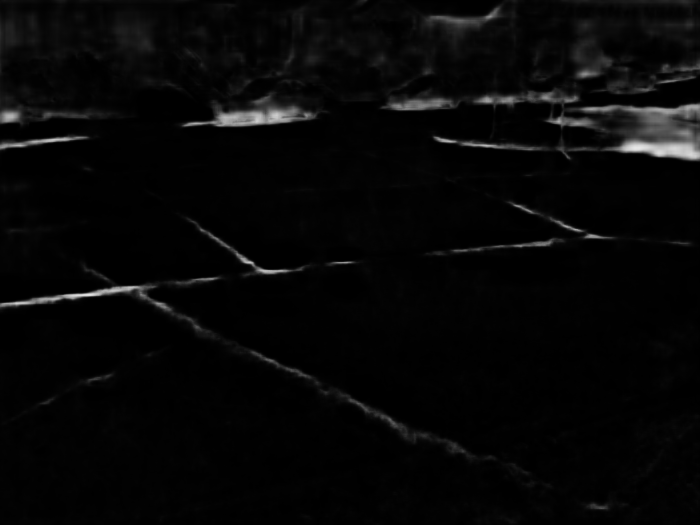

In [24]:
#############
# DEEPCRACK #
#############
import os
import numpy as np
import cv2
from google.colab.patches import cv2_imshow # In colab you need to use this instead of cv2.imshow

# Set path and variables
result_path='/content/DeepSegmentor/results/deepcrack/test_latest/images/'
list_result_fused_files=[]
show_all_fused_output_files=1

# Filter output files
if show_all_fused_output_files:
  list_result_files=os.listdir(result_path)
  print(f'The output files are: {list_result_files}')
  print(f'We only are going to show you *_fused.png files')
  for r_file in list_result_files:
    if '_fused' in r_file:
      list_result_fused_files.append(r_file)
      print(f'{r_file} added to the list')

# Show in output (Only Colab)

for result_fused_file in list_result_fused_files:
  # img is in BGR format if the underlying image is a color image
  img = cv2.imdecode(np.fromfile(result_path+result_fused_file, dtype=np.uint8), cv2.IMREAD_UNCHANGED)
  cv2_imshow(img)

The output files are: ['demo_image.png', 'demo_label_gt.png', 'demo_label_pred.png']
We only are going to show you *_pred.png files
demo_label_pred.png added to the list


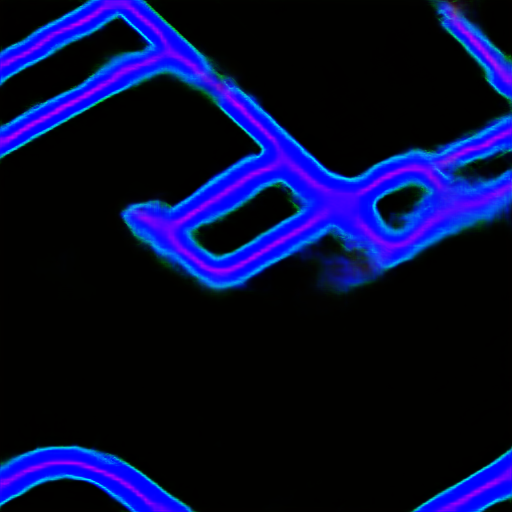

In [53]:
#############
# ROADNET #
#############
import os
import numpy as np
import cv2
from google.colab.patches import cv2_imshow # In colab you need to use this instead of cv2.imshow

# Set path and variables
result_path='/content/DeepSegmentor/results/roadnet/test_latest/images/'
list_result_pred_files=[]
show_all_pred_output_files=1

# Filter output files
if show_all_pred_output_files:
  list_result_files=os.listdir(result_path)
  print(f'The output files are: {list_result_files}')
  print(f'We only are going to show you *_pred.png files')
  for r_file in list_result_files:
    if '_pred' in r_file:
      list_result_pred_files.append(r_file)
      print(f'{r_file} added to the list')

# Show in output (Only Colab)

for result_pred_file in list_result_pred_files:
  # img is in BGR format if the underlying image is a color image
  img = cv2.imdecode(np.fromfile(result_path+result_pred_file, dtype=np.uint8), cv2.IMREAD_UNCHANGED)
  cv2_imshow(img)


# 7. Extras

## 7.1 Delete test images and results

In [37]:
# Where test images you need to upload
!rm /content/DeepSegmentor/datasets/DeepCrack/test_img/*;
!rm /content/DeepSegmentor/datasets/RoadNet/test_image/*;
# Where test results are saved
!rm -r /content/DeepSegmentor/results -f;

rm: cannot remove '/content/DeepSegmentor/datasets/DeepCrack/test_img/*': No such file or directory
rm: cannot remove '/content/DeepSegmentor/datasets/RoadNet/test_image/*': No such file or directory


## 7.2 Zip results and then download

This code will create a zip called "myresults.zip"

In [ ]:
# DEEPCRACK
!zip myresultsDeepCrack.zip /content/DeepSegmentor/results/deepcrack/test_latest/images/*

# ROADNET 
!zip myresultsRoadNet.zip /content/DeepSegmentor/results/roadnet/test_latest/images/*

# Finally, find the file and download as usually.